In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from Wind.Results import DBResults
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal
import matplotlib.pyplot as plt

First fit experiment RNN seq2seq, explore lag, dropout and number of input neurons, number of layers and number of neurons in the fully connected layer

In [7]:

query={'experiment':'rnns2sfit'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full'], data=['lag'])

In [8]:
results.exp_df 

,hour,site,test,val,lag,drop,neurons,nlayers,full
0,1,18880,0.900590,0.869442,12,0.0,128,1,[32]
1,2,18880,0.810338,0.770808,12,0.0,128,1,[32]
2,3,18880,0.750209,0.710093,12,0.0,128,1,[32]
3,4,18880,0.702192,0.666731,12,0.0,128,1,[32]
4,5,18880,0.664485,0.632457,12,0.0,128,1,[32]
5,6,18880,0.637677,0.605401,12,0.0,128,1,[32]
6,7,18880,0.614271,0.583647,12,0.0,128,1,[32]
7,8,18880,0.597062,0.564734,12,0.0,128,1,[32]
8,9,18880,0.575207,0.546397,12,0.0,128,1,[32]
9,10,18880,0.556831,0.531293,12,0.0,128,1,[32]


<Figure size 1200x800 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

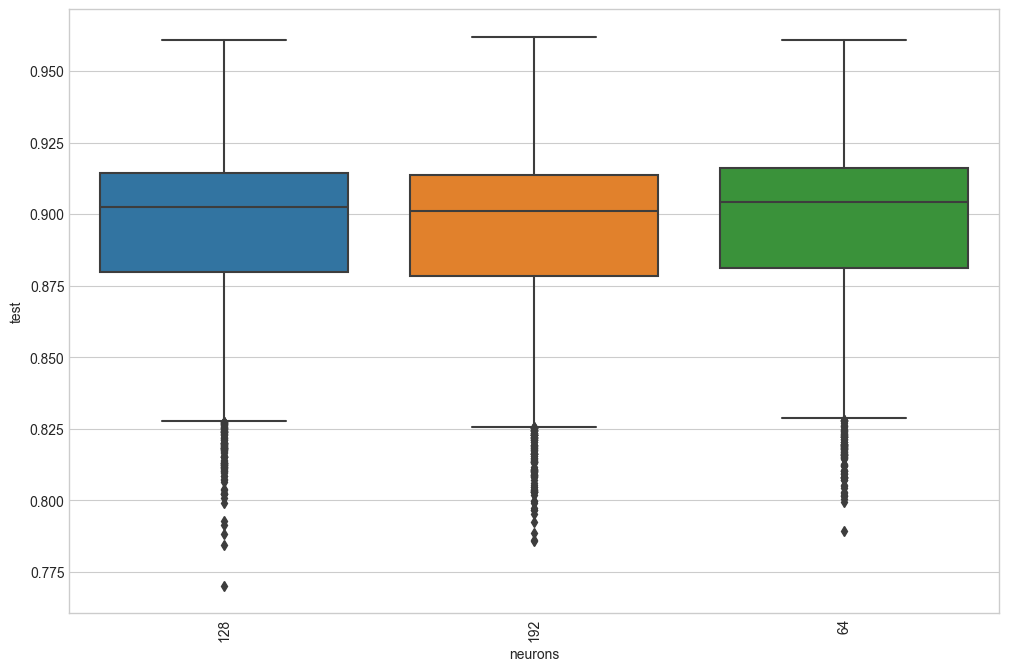

In [9]:
plt.figure(figsize=(12,8), dpi=100)
plt.style.use('seaborn-whitegrid')
plt.xticks(rotation=90)
sns.boxplot(x='neurons', y='test', data=results.exp_df[results.exp_df.hour==1])

In [10]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'nlayers', 'lag', 'full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d5a9e4ac8>,
      dtype=object)

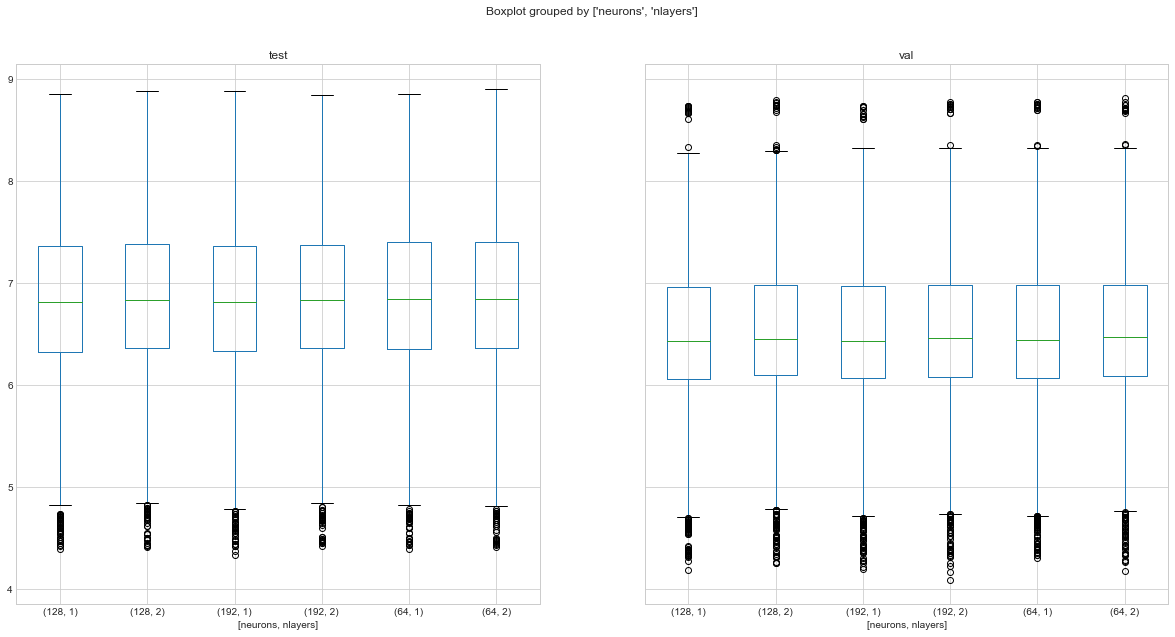

In [11]:
# plt.figure(figsize=(12,8), dpi=100)
# plt.style.use('seaborn-whitegrid')
# plt.xticks(rotation=90)
#sns.boxplot(x='neuronsD', by='dropout', y='test', data=a)
a.boxplot(by=['neurons', 'nlayers'],figsize=(20,10))

Selects the 500 best/worst results and plots in a map the sum of R² of all the hours for test and validation

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d4c1e9278>,
      dtype=object)

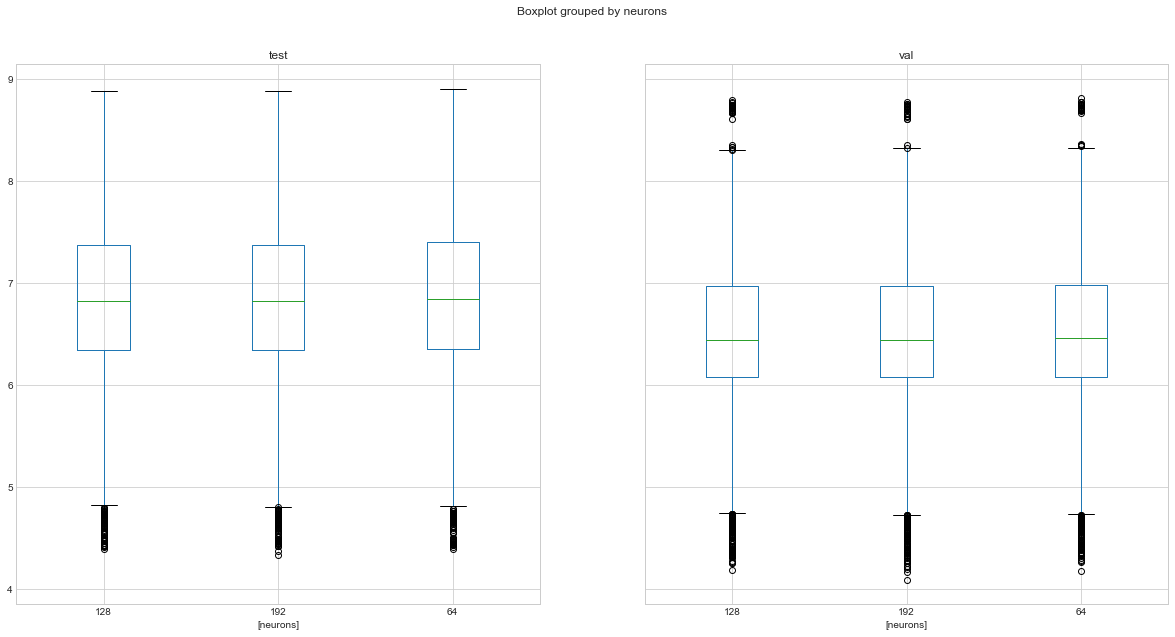

In [12]:
a.boxplot(by='neurons',figsize=(20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d4d5b3ef0>,
      dtype=object)

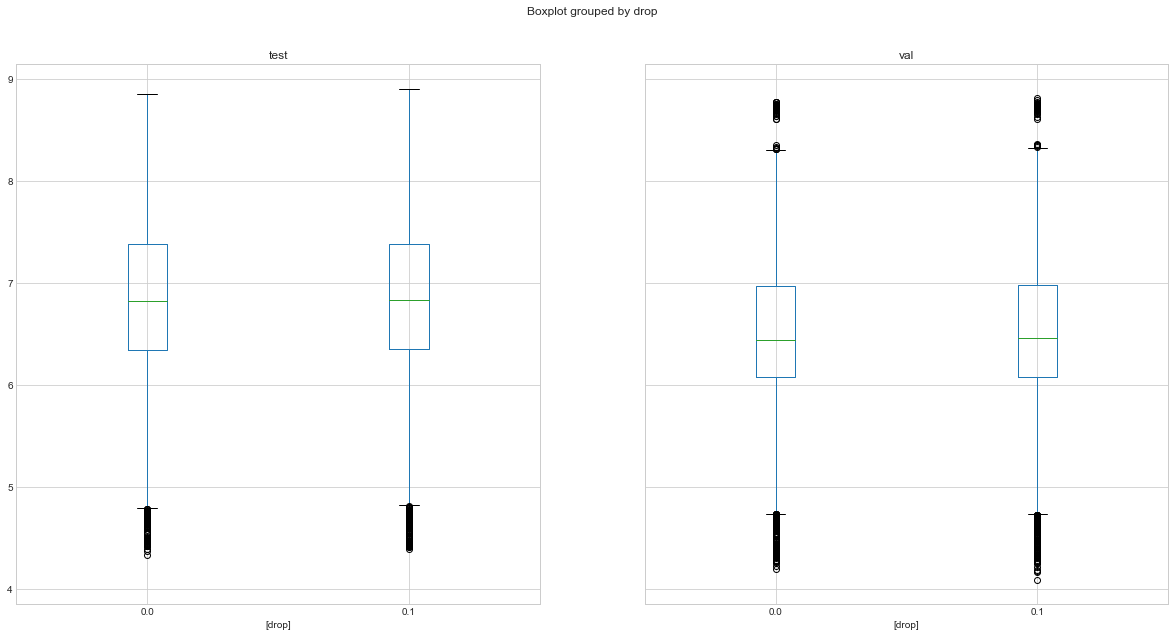

In [13]:
a.boxplot(by='drop',figsize=(20,10))

In [14]:
b =a.groupby(by=['neurons', 'nlayers', 'drop', 'lag', 'full'],as_index=False).mean()
b[b.neurons=='64'].style.highlight_max()

,neurons,nlayers,drop,lag,full,test,val
48,64,1,0.0,12,[128],6.81122,6.50493
49,64,1,0.0,12,[32],6.77719,6.47511
50,64,1,0.0,12,[64],6.80115,6.49167
51,64,1,0.0,18,[128],6.79477,6.47753
52,64,1,0.0,18,[32],6.75001,6.44591
53,64,1,0.0,18,[64],6.78488,6.46812
54,64,1,0.1,12,[128],6.82903,6.51836
55,64,1,0.1,12,[32],6.77834,6.47607
56,64,1,0.1,12,[64],6.79629,6.4962
57,64,1,0.1,18,[128],6.79688,6.4801


Best results  64/2/0.1/12/128

Second fit of RNN, explore type of unit, lag and some more neuronsE and neuronsD

In [15]:
query={'experiment':'rnns2sfit2'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'full'])

In [16]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

In [17]:
b =a.groupby(by=['neurons', 'drop', 'full'],as_index=False).mean()
b

,neurons,drop,full,test,val
0,32,0.1,"[128, 32]",6.868900,6.580629
1,32,0.1,"[128, 64]",6.880448,6.590801
2,32,0.1,[128],6.887557,6.586739
3,32,0.1,[256],6.884338,6.581618
4,32,0.2,"[128, 32]",6.871714,6.592610
5,32,0.2,"[128, 64]",6.874463,6.595075
6,32,0.2,[128],6.886765,6.600037
7,32,0.2,[256],6.890972,6.593247
8,32,0.3,"[128, 32]",6.869328,6.591006
9,32,0.3,"[128, 64]",6.878441,6.599961


In [18]:
b.describe(include='all')

,neurons,drop,full,test,val
count,36,36,36,36.000000,36.000000
unique,3,3,4,NaN,NaN
top,32,0.3,[128],NaN,NaN
freq,12,12,9,NaN,NaN
mean,NaN,NaN,NaN,6.858450,6.570919
std,NaN,NaN,NaN,0.027094,0.021759
min,NaN,NaN,NaN,6.773698,6.515852
25%,NaN,NaN,NaN,6.843031,6.559572
50%,NaN,NaN,NaN,6.866779,6.572102
75%,NaN,NaN,NaN,6.875976,6.587755


In [19]:
b[b.neurons=='32'].style.highlight_max()

,neurons,drop,full,test,val
0,32,0.1,"[128, 32]",6.8689,6.58063
1,32,0.1,"[128, 64]",6.88045,6.5908
2,32,0.1,[128],6.88756,6.58674
3,32,0.1,[256],6.88434,6.58162
4,32,0.2,"[128, 32]",6.87171,6.59261
5,32,0.2,"[128, 64]",6.87446,6.59508
6,32,0.2,[128],6.88677,6.60004
7,32,0.2,[256],6.89097,6.59325
8,32,0.3,"[128, 32]",6.86933,6.59101
9,32,0.3,"[128, 64]",6.87844,6.59996


Best results 32/2/0.3/12/256/GRU

Third fit of RNN, explore number of layers

In [20]:
query={'experiment':'rnns2sfit3'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'nlayers', 'full', 'fulldrop'],data=['lag'])

In [21]:
results.exp_df 

,hour,site,test,val,lag,drop,neurons,nlayers,full,fulldrop
0,1,50510,0.921004,0.913632,12,0.3,32,2,[256],0.0
1,2,50510,0.838314,0.830000,12,0.3,32,2,[256],0.0
2,3,50510,0.775452,0.764690,12,0.3,32,2,[256],0.0
3,4,50510,0.717580,0.703903,12,0.3,32,2,[256],0.0
4,5,50510,0.666559,0.644347,12,0.3,32,2,[256],0.0
5,6,50510,0.620299,0.594862,12,0.3,32,2,[256],0.0
6,7,50510,0.576677,0.545192,12,0.3,32,2,[256],0.0
7,8,50510,0.538918,0.509890,12,0.3,32,2,[256],0.0
8,9,50510,0.502364,0.476411,12,0.3,32,2,[256],0.0
9,10,50510,0.466778,0.446344,12,0.3,32,2,[256],0.0


In [22]:
results.exp_df['fulldrop'].value_counts()

0.0     28800
0.1     28800
0.05    28800
Name: fulldrop, dtype: int64

In [23]:
a=results.exp_df.groupby(['site', 'full', 'fulldrop', 'lag', 'drop'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)
a

,full,fulldrop,lag,drop,test,val
0,"[256, 128]",0.0,12,0.3,6.964946,6.738859
1,"[256, 128]",0.0,12,0.4,7.006247,6.780392
2,"[256, 128]",0.0,18,0.3,6.932578,6.489982
3,"[256, 128]",0.0,18,0.4,6.951903,6.532860
4,"[256, 128]",0.05,12,0.3,7.012885,6.803431
5,"[256, 128]",0.05,12,0.4,6.931262,6.771315
6,"[256, 128]",0.05,18,0.3,6.802749,6.414303
7,"[256, 128]",0.05,18,0.4,6.873834,6.601076
8,"[256, 128]",0.1,12,0.3,7.084111,6.804040
9,"[256, 128]",0.1,12,0.4,7.001346,6.757297


In [24]:
b =a.groupby(by=['full', 'fulldrop', 'lag', 'drop' ],as_index=False).mean()
b.style.highlight_max()

,full,fulldrop,lag,drop,test,val
0,"[256, 128]",0.0,12,0.3,6.86642,6.57603
1,"[256, 128]",0.0,12,0.4,6.87368,6.57497
2,"[256, 128]",0.0,18,0.3,6.80406,6.50412
3,"[256, 128]",0.0,18,0.4,6.80098,6.4848
4,"[256, 128]",0.05,12,0.3,6.89042,6.60166
5,"[256, 128]",0.05,12,0.4,6.8867,6.60287
6,"[256, 128]",0.05,18,0.3,6.8357,6.53171
7,"[256, 128]",0.05,18,0.4,6.85067,6.54305
8,"[256, 128]",0.1,12,0.3,6.88703,6.60549
9,"[256, 128]",0.1,12,0.4,6.85256,6.5657


Best results 32/2/0.4/12/512/0.1/GRU

Fourth fit of RNN, reexplore lag, decoder neurons, dropout and decoder layers

In [25]:
query={'experiment':'rnns2sfit4'}

results = DBResults(conn=mongolocaltest)
#results = DBResults()

results.retrieve_results_dataframe(query, arch=['drop', 'neurons', 'full', 'fulldrop'])

In [26]:
results.exp_df 

,hour,site,test,val,vars,ahead,lag,drop,neurons,full,fulldrop
0,1,50510,0.923717,0.915550,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
1,2,50510,0.844780,0.834446,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
2,3,50510,0.784859,0.771178,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
3,4,50510,0.732298,0.711874,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
4,5,50510,0.682088,0.653035,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
5,6,50510,0.635312,0.600191,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
6,7,50510,0.593552,0.556174,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
7,8,50510,0.554715,0.513079,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
8,9,50510,0.519164,0.475348,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1
9,10,50510,0.481844,0.437066,"[0, 1, 2, 3, 4, 5, 6]",12,12,0.3,16,[512],0.1


In [27]:
a=results.exp_df.groupby(['site', 'drop', 'neurons', 'fulldrop','full'],as_index=False).sum()
a.drop(columns=['hour', 'site'], inplace=True)

In [28]:
b =a.groupby(by=['neurons',  'full', 'drop', 'fulldrop' ],as_index=False).mean()
b.style.highlight_max()

,neurons,full,drop,fulldrop,test,val
0,16,[1024],0.3,0.1,6.79354,6.48243
1,16,[1024],0.3,0.2,6.86541,6.595
2,16,[1024],0.4,0.1,6.78802,6.4769
3,16,[1024],0.4,0.2,6.84437,6.5687
4,16,[1024],0.5,0.1,6.79148,6.47827
5,16,[1024],0.5,0.2,6.84903,6.55126
6,16,[512],0.3,0.1,6.80735,6.50339
7,16,[512],0.3,0.2,6.88849,6.63598
8,16,[512],0.4,0.1,6.79384,6.48541
9,16,[512],0.4,0.2,6.88307,6.59668


final best configuration GRU/196/1/196/1/0.0/18